In [2]:
# https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./diamonds.csv')

# cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color diamond colour, from J (worst) to D (best)
# clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

# price price in US dollars (\$326--\$18,823)
# carat weight of the diamond (0.2--5.01)
# x length in mm (0--10.74)
# y width in mm (0--58.9)
# z depth in mm (0--31.8)
# depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# table width of top of diamond relative to widest point (43--95)

In [5]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [34]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [9]:
print(df['price'].median())
print(df['price'].mean())
print(df['price'].max())
print(df['price'].min())

2401.0
3932.799721913237
18823
326


In [10]:
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
df_numerics_only.median()

carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

In [12]:
print(df['price'].mode())
print(df['cut'].mode())
print(df['color'].mode())

0    605
Name: price, dtype: int64
0    Ideal
Name: cut, dtype: object
0    G
Name: color, dtype: object


In [13]:
df_numerics_only.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [14]:
#Standard error of mean
df_numerics_only.sem()

carat     0.002041
depth     0.006168
table     0.009621
price    17.177361
x         0.004830
y         0.004918
z         0.003039
dtype: float64

In [15]:
df_numerics_only.skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

In [16]:
#kurtosis
sr = pd.Series(df['price'])
print(sr.kurtosis())
# Leptokurtic kurtosis

2.17769575924869


In [17]:
df_numerics_only.var()

carat    2.246867e-01
depth    2.052404e+00
table    4.992948e+00
price    1.591563e+07
x        1.258347e+00
y        1.304472e+00
z        4.980109e-01
dtype: float64

In [18]:
df_numerics_only.std()

carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64

<AxesSubplot: >

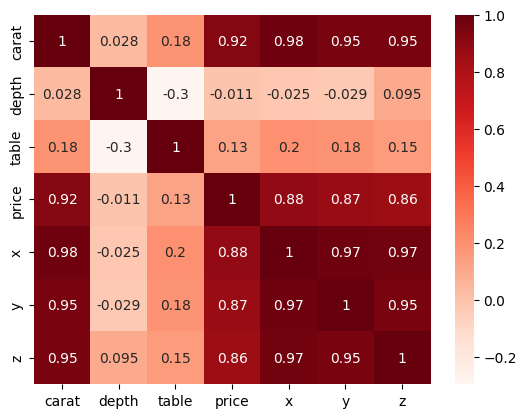

In [42]:
import seaborn as sns
corr = df_numerics_only.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

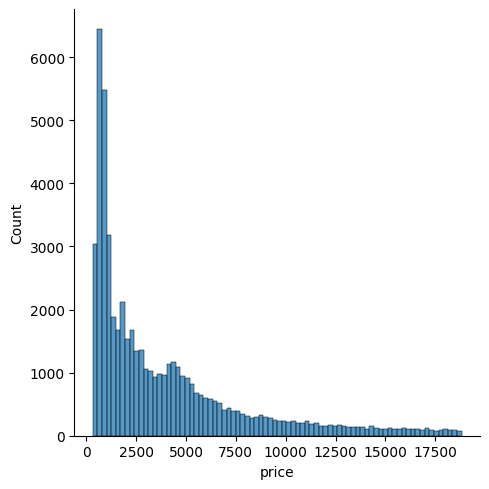

In [45]:
g=sns.displot(df['price'])

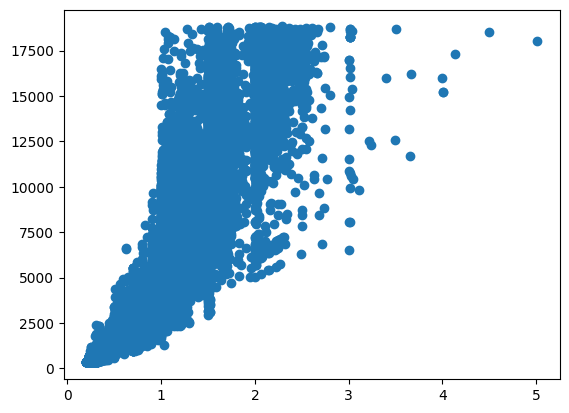

In [21]:
plt.scatter(df['carat'], df['price'])
plt.show()

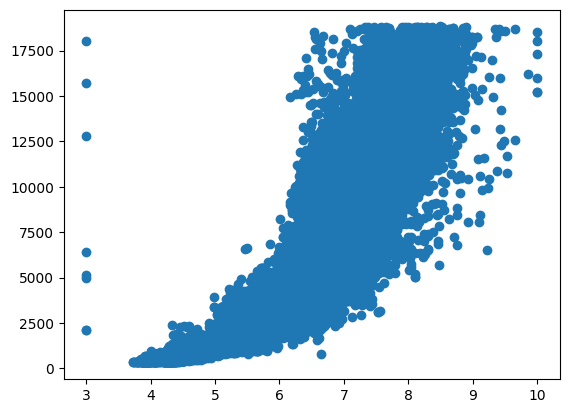

In [22]:
df['x'] = df['x'].clip(lower=3, upper=10)
plt.scatter(df['x'], df['price'])
plt.show()

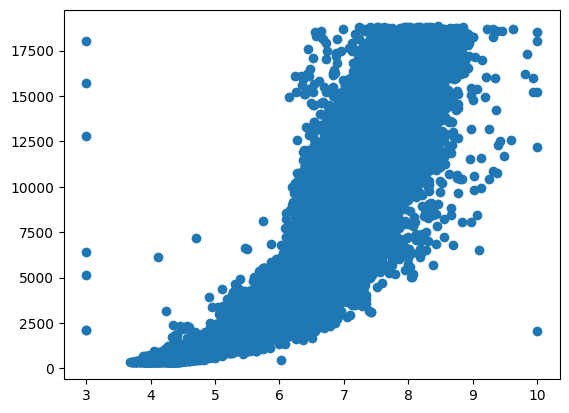

In [23]:
df['y'] = df['y'].clip(lower=3, upper=10)
plt.scatter(df['y'], df['price'])
plt.show()

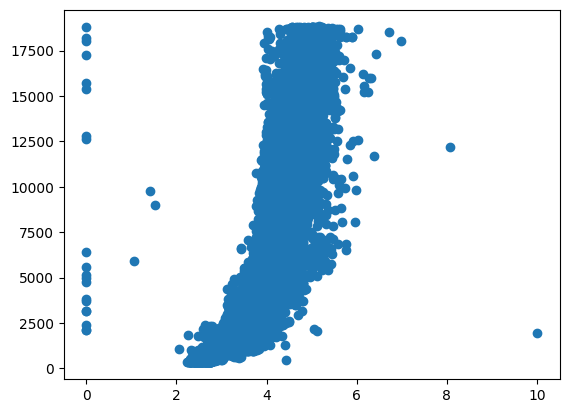

In [24]:
df['z'] = df['z'].clip(lower=0, upper=10)
plt.scatter(df['z'], df['price'])
plt.show()

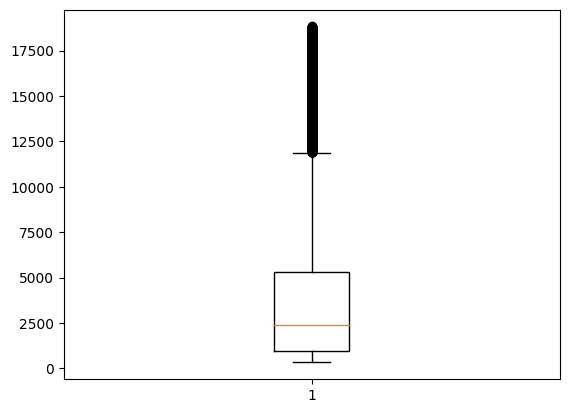

In [25]:
plt.boxplot(df['price'])
plt.show()

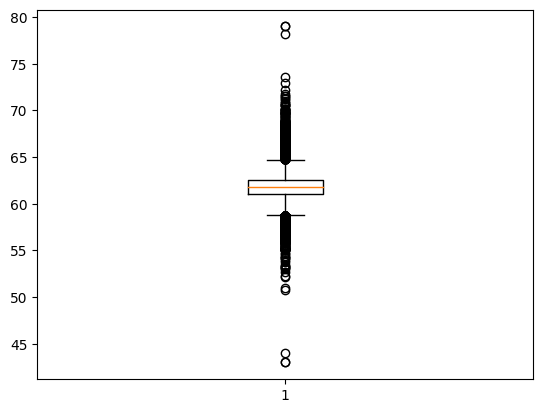

In [26]:
plt.boxplot(df['depth'])  # (43--79)
plt.show()

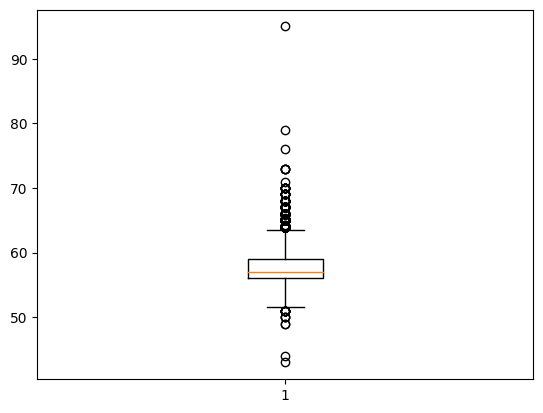

In [27]:
# (43--95)
plt.boxplot(df['table'])
plt.show()

In [28]:
from scipy import stats
stats.trim_mean(df['price'], 0.1)

3158.9923526140155

In [29]:
df['price'].mean()

3932.799721913237

In [47]:
#Frequency
count = df['cut'].value_counts()
print(count)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


<AxesSubplot: xlabel='y', ylabel='Count'>

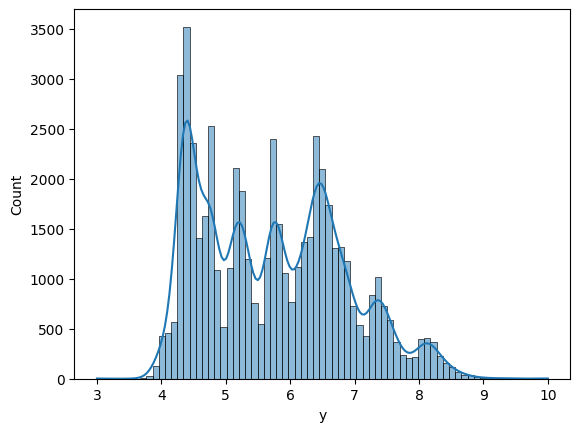

In [49]:
sns.histplot(data=df, x='y', kde=True)

In [32]:

import plotly.express as px

fig = px.scatter(df, x="x", y="y",
                 size='z', 
                 hover_data=['z'])

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


In [51]:
df = pd.read_csv('./mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [55]:
sns.pairplot(df_numeric)

ValueError: No variables found for grid columns.